# Proyek Analisis Data: Bike-sharing-dataset
- **Nama:** Davi Sulaiman
- **Email:** mc189d5y0317@student.devacademy.id
- **ID Dicoding:** mc189d5y0317

## Menentukan Pertanyaan Bisnis

- Kapan Waktu Puncak untuk melakukan penyewaan sepeda (Hari, Jam, serta Hari dan Jam)?
- Pada musim apa penyewaan sepeda paling banyak dan paling sedikit?
- Apakah suhu, cuaca, dan kelembapan mempengaruhi terhadap penyewaan sepeda?
- Bagaimana performa penyewaan sepeda dalam tahun terakhir
- Seberapa banyak orang memilih registered dan casual untuk melakukan rental sepeda?

## Import Semua Packages/Library yang Digunakan

In [109]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

###### 1. Gathering untuk tabel day_df

###### **Insight**

Menambahkan dataframe day_df yang mana didapatka dari dataset day.csv

In [110]:
day_df = pd.read_csv("./Data/day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


**Insight**

Struktur Data (day_df.info())
Jika kita menjalankan day_df.info(), kita akan melihat tipe data untuk setiap kolom, misalnya:

- dteday: Tipe data object (sebaiknya dikonversi ke datetime untuk analisis waktu)
- season, yr, mnth, holiday, weekday, workingday, weathersit: Kategori (int64)
- temp, atemp, hum, windspeed: Variabel numerik (float64)
- casual, registered, cnt: Variabel target jumlah peminjaman (int64)
- Jika ada nilai null, perlu dicek dan ditangani.

###### 2. Gathering untuk tabel hour_df

###### **Insight**

Menambahkan dataframe hour_df yang mana didapatka dari dataset hour_csv

In [111]:
hour_df = pd.read_csv("./Data/hour.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


###### **Insight**

Data peminjaman sepeda menunjukkan pola yang jelas berdasarkan waktu dan kondisi eksternal. Peminjaman cenderung meningkat pada jam sibuk, yaitu pukul 07:00-09:00 dan 17:00-19:00, yang mencerminkan pola perjalanan kerja. Selain itu, pengguna terdaftar (registered) lebih dominan dibandingkan pengguna tidak terdaftar (casual), terutama pada hari kerja. Faktor cuaca juga berpengaruh terhadap jumlah peminjaman, di mana peminjaman cenderung menurun saat kondisi cuaca buruk (weathersit=3 atau 4). Perbedaan pola peminjaman juga terlihat antara hari kerja dan hari libur, di mana peminjaman pada hari kerja lebih teratur, sementara pada hari libur lebih bervariasi. Insight ini dapat digunakan untuk mengoptimalkan ketersediaan sepeda berdasarkan waktu dan kondisi tertentu.

### Assessing Data

###### 1. Assessing untuk tabel day_df

###### **Insight**

Mencari informasi untuk dataset day_df

In [112]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


###### **Insight**

Pada day_df ini terdapat 16 column yang mana 731 nilainya non null, namun terdapat beberapa nama yang sulit dimenegrti dan tipe data yang salah di beberapa kolom yang harus diperbaiki

Checking Missing Value

In [113]:
day_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

**Insight**
Pengecekan nilai uniq yang digunakan pada pandas

In [114]:
day_df.nunique()

instant       731
dteday        731
season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          499
atemp         690
hum           595
windspeed     650
casual        606
registered    679
cnt           696
dtype: int64

Pengecekan apakah data terdapat duplikasi  atau tidak

In [115]:
print("Jumlah duplikasi: ", day_df.duplicated().sum())

Jumlah duplikasi:  0


**Insight**

Data pada day_df tidak terdapat duplikasi

Mendeskripsikan day_df

In [116]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


**Insight**

Data peminjaman sepeda harian menunjukkan rata-rata peminjaman sekitar 4.504 sepeda per hari, dengan fluktuasi tinggi antara 22 hingga 8.714 sepeda. Peminjaman lebih sering terjadi pada hari kerja (68%) dibandingkan hari libur, dengan pengguna terdaftar (3.656 peminjaman/hari) lebih dominan dibandingkan pengguna tidak terdaftar (848 peminjaman/hari). Sebagian besar hari memiliki cuaca baik (weathersit=1,39), dan suhu bervariasi cukup besar antara 5,9% hingga 86,2% dari skala normalisasi. Secara keseluruhan, pola peminjaman dipengaruhi oleh musim, hari kerja, serta kondisi cuaca, dengan potensi analisis lebih lanjut terhadap hubungan antar variabel.

###### 2. Assessing untuk tabel hour_df

Mencari informasi dataset hour_df

In [117]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


###### **Insight**

Pada hour_df ini terdapat 17 column yang mana 17379 nilainya non null, namun terdapat beberapa nama yang sulit dimenegrti dan tipe data yang salah di beberapa kolom yang harus diperbaiki

Checking Missing Value

In [118]:
hour_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

**Insight**

Dataset hour_df tidak memiliki nilai yang hilang (missing values) pada semua kolom, yang berarti data dalam kondisi bersih dan siap untuk analisis lebih lanjut. Hal ini memastikan bahwa tidak diperlukan langkah tambahan seperti imputasi atau penghapusan data yang kosong, sehingga eksplorasi dan pemodelan dapat dilakukan tanpa kendala terkait data yang tidak lengkap.

Pengecekan uniq hour_df menggunakan pandas

In [119]:
hour_df.nunique()

instant       17379
dteday          731
season            4
yr                2
mnth             12
hr               24
holiday           2
weekday           7
workingday        2
weathersit        4
temp             50
atemp            65
hum              89
windspeed        30
casual          322
registered      776
cnt             869
dtype: int64

**Insight**

Dataset hour_df mencakup sekitar dua tahun data dengan pencatatan per jam, mencerminkan pola peminjaman sepeda yang dipengaruhi oleh waktu, cuaca, dan tipe pengguna. Variasi dalam musim (4), bulan (12), hari dalam seminggu (7), serta kondisi cuaca (4) menunjukkan bahwa data mencerminkan berbagai kondisi lingkungan. Faktor waktu seperti jam (24), hari kerja vs. libur (2), dan tahun (2) turut berkontribusi dalam analisis tren peminjaman. Selain itu, jumlah peminjaman sepeda sangat bervariasi, dengan 322 nilai unik untuk pengguna kasual, 776 untuk pengguna terdaftar, dan 869 untuk total peminjaman, menunjukkan perbedaan pola penggunaan antara pengguna tetap dan sementara. Secara keseluruhan, dataset ini kaya akan variasi data, memungkinkan eksplorasi mendalam terhadap faktor-faktor yang memengaruhi peminjaman sepeda.

Melihat data apakah ada duplikasi atau tidak

In [120]:
print("Jumlah duplikasi: ", hour_df.duplicated().sum())

Jumlah duplikasi:  0


**Insight**

Dataset hour_df tidak memiliki data duplikat, yang berarti setiap baris dalam dataset bersifat unik. Hal ini menunjukkan bahwa data telah bersih dan siap untuk analisis lebih lanjut tanpa perlu proses pembersihan duplikasi.

Mendeskripsikan hour_df

In [121]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


**Insight**

Dataset ini mencakup data peminjaman sepeda selama dua tahun, dengan distribusi musim yang cukup merata. Data dikumpulkan setiap jam, menunjukkan bahwa jam sibuk terjadi pada siang hingga sore hari. Sebagian besar peminjaman terjadi pada hari kerja (68%), sementara hari libur hanya mencakup 2,87% dari total data. Faktor lingkungan seperti suhu, kelembaban, dan kecepatan angin menunjukkan variasi yang cukup besar, dengan suhu rata-rata 50% dalam skala normalisasi, serta kelembaban dan kecepatan angin yang berfluktuasi secara signifikan. Dari segi peminjaman, rata-rata jumlah sepeda yang dipinjam per jam adalah 189 sepeda, dengan variasi yang cukup besar, di mana jumlah minimum hanya 1 sepeda dan maksimum mencapai 977 sepeda. Peminjaman didominasi oleh pengguna terdaftar, dengan median 115 sepeda per jam, jauh lebih tinggi dibandingkan pengguna kasual yang hanya 17 sepeda per jam. Secara keseluruhan, standar deviasi yang tinggi menunjukkan bahwa pola peminjaman sangat dipengaruhi oleh faktor waktu, cuaca, dan hari kerja.

### Cleaning Data

####  Cleaning Data untuk kolom day_df dan hour_df


*   Untuk Cleaning data tabel day dan tabel hour diletakkan di baris kode yang sama karena ketika sudah melakukan describe field data tersebut kurang lebih sama
* mengganti beberapa nama kolom agar mudah dibaca
*   Saya akan menghapus kolom workingday karena menurut saya sudah diwakili oleh kolom weekday
* Untuk kolom 'season', 'mnth', 'holiday', 'weekday', weathersit' diubah tipe datanya menjadi categorical data
* untuk kolom dteday diubah tipe datanya menjadi datetime
* mengubah isi kolom agar mudah dipahami



#### Rename

###### 1. Mengganti nama kolom untuk tabel day_df & hour_df

In [122]:
day_df.rename(columns={
    'dteday': 'date',
    "yr":'year',
    'mnth':'month',
    'weekday':'one_week',
    'weathersit':'weather_condition',
    'hum':'humidity',
    'cnt':'count_rental'
    }, inplace=True)

**Insight**

Dataset day_df telah mengalami perubahan nama kolom untuk meningkatkan keterbacaan. Kolom dteday diganti menjadi date, menunjukkan tanggal peminjaman, sementara yr dan mnth menjadi year dan month, memudahkan analisis berdasarkan tahun dan bulan. Kolom weekday diubah menjadi one_week, memungkinkan identifikasi hari dalam seminggu, dan weathersit menjadi weather_condition, yang memberikan informasi tentang kondisi cuaca saat peminjaman terjadi. Selain itu, hum diubah menjadi humidity, menunjukkan tingkat kelembaban udara, dan cnt menjadi count_rental, yang secara langsung merepresentasikan jumlah peminjaman sepeda per hari. Perubahan ini membantu meningkatkan kejelasan dan kemudahan dalam interpretasi data untuk analisis lebih lanjut.

In [123]:
hour_df.rename(columns={
    'dteday': 'date',
    "yr":'year',
    'mnth':'month',
    'hr' : 'hour',
    'weekday':'one_week',
    'weathersit':'weather_condition',
    'hum':'humidity',
    'cnt':'count_rental'
    }, inplace=True)

**Insight**

Dataset telah diperbarui dengan nama kolom yang lebih deskriptif, seperti date, year, month, dan hour, sehingga mempermudah interpretasi data waktu. Selain itu, weekday diubah menjadi one_week, yang menunjukkan hari dalam satu minggu, serta weathersit menjadi weather_condition untuk menggambarkan kondisi cuaca dengan lebih jelas. Variabel hum diubah menjadi humidity, menyoroti tingkat kelembaban, sedangkan cnt menjadi count_rental untuk merepresentasikan jumlah peminjaman sepeda secara lebih eksplisit. Perubahan ini meningkatkan keterbacaan dan pemahaman dataset, mempermudah analisis lebih lanjut terhadap pola peminjaman berdasarkan waktu, cuaca, dan faktor lingkungan lainnya.

### 2. Dropping  untuk tabel day_df dan hour_df

In [124]:
# drop working day
day_df.drop(['workingday'], axis = 1, inplace = True)
hour_df.drop(['workingday'], axis = 1, inplace = True)

**Insight**

Kolom workingday telah dihapus dari kedua dataset (day_df dan hour_df) karena mungkin kurang relevan atau memiliki korelasi yang rendah dengan analisis yang akan dilakukan. Penghapusan ini dapat menyederhanakan dataset tanpa menghilangkan informasi penting, terutama karena faktor hari kerja masih dapat dianalisis melalui variabel lain seperti one_week (hari dalam seminggu) dan holiday (hari libur). Dengan demikian, fokus analisis dapat lebih diarahkan pada faktor-faktor lain seperti cuaca, jam dalam sehari, dan musim dalam mempengaruhi jumlah peminjaman sepeda.

In [125]:
#menampilkan field column
day_df.info()
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   instant            731 non-null    int64  
 1   date               731 non-null    object 
 2   season             731 non-null    int64  
 3   year               731 non-null    int64  
 4   month              731 non-null    int64  
 5   holiday            731 non-null    int64  
 6   one_week           731 non-null    int64  
 7   weather_condition  731 non-null    int64  
 8   temp               731 non-null    float64
 9   atemp              731 non-null    float64
 10  humidity           731 non-null    float64
 11  windspeed          731 non-null    float64
 12  casual             731 non-null    int64  
 13  registered         731 non-null    int64  
 14  count_rental       731 non-null    int64  
dtypes: float64(4), int64(10), object(1)
memory usage: 85.8+ KB
<class 'pandas.

**Insight**

Dataset day_df memiliki 731 entri dengan 15 kolom, sedangkan hour_df memiliki 17.379 entri dengan 16 kolom. Kedua dataset tidak memiliki nilai yang hilang (non-null count sesuai dengan jumlah entri), sehingga data sudah bersih dan siap untuk dianalisis. Kolom date bertipe objek, sementara atribut lainnya bertipe numerik (int64 dan float64), memungkinkan berbagai jenis analisis statistik dan visualisasi. Dataset harian lebih ringkas dengan data yang dirangkum per hari, sedangkan dataset per jam lebih rinci, memungkinkan eksplorasi pola peminjaman sepeda berdasarkan waktu secara lebih mendetail.

#### Convert Data Type

###### Mengubah tipe data date (object to datatime)

In [126]:
day_df['date']=pd.to_datetime(day_df['date'])
hour_df['date']=pd.to_datetime(hour_df['date'])

**Insight**

Dengan mengonversi kolom date menjadi tipe datetime, dataset kini lebih siap untuk analisis berbasis waktu. Ini memungkinkan ekstraksi fitur seperti hari, bulan, tahun, atau tren musiman dengan lebih mudah. Selain itu, analisis seperti tren harian, per jam, atau pengaruh waktu terhadap peminjaman sepeda dapat dilakukan dengan lebih akurat. Hal ini juga mempermudah dalam melakukan pengelompokan data dan visualisasi berdasarkan periode tertentu.

###### Mengubah tipe data season, month, holiday, one_of_week, weather_conditon (object to datatime)

In [127]:
columns = ['season', 'month', 'holiday', 'one_week', 'weather_condition']

for column in columns:
    day_df[column] =  day_df[column].astype("category")
    hour_df[column] =  hour_df[column].astype("category")

**Insight**

Beberapa kolom dengan nilai kategorikal seperti musim, bulan, hari libur, hari dalam seminggu, dan kondisi cuaca telah dikonversi ke tipe data category. Hal ini akan meningkatkan efisiensi penyimpanan data dan mempercepat proses analisis serta pemrosesan data.

##### Konversi isi kolom day_df dan hour_df

In [128]:
day_df['season'] = day_df['season'].replace({1:'Spring', 2:'Summer', 3:'Fall', 4:'Winter'})
hour_df['season'] = hour_df['season'].replace({1:'Spring', 2:'Summer', 3:'Fall', 4:'Winter'})

day_df['month'] = day_df['month'].replace({1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'Jun',
                                           7:'Jul', 8:'Aug', 9:'Sep', 10:'Oct', 11:'Nov', 12:'Dec'})
hour_df['month'] = hour_df['month'].replace({1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'Jun',
                                             7:'Jul', 8:'Aug', 9:'Sep', 10:'Oct', 11:'Nov', 12:'Dec'})

day_df['weather_condition'] = day_df['weather_condition'].replace({1:'Clear', 2:'Misty', 3:'Light_rainsnow', 4:'Heavy_rainsnow'})
hour_df['weather_condition'] = hour_df['weather_condition'].replace({1:'Clear', 2:'Misty', 3:'Light_rainsnow', 4:'Heavy_rainsnow'})

day_df['one_week'] = day_df['one_week'].replace({0:'Sunday', 1:'Monday', 2:'Tuesday', 3:'Wednesday', 4:'Thursday', 5:'Friday', 6:'Saturday'})
hour_df['one_week'] = hour_df['one_week'].replace({0:'Sunday', 1:'Monday', 2:'Tuesday', 3:'Wednesday', 4:'Thursday', 5:'Friday', 6:'Saturday'})

day_df['year'] = day_df['year'].replace({0:'2011', 1:'2012'})
hour_df['year'] = hour_df['year'].replace({0:'2011', 1:'2012'})

day_df['humidity'] = day_df['humidity']*100
hour_df['humidity'] = hour_df['humidity']*100

C:\Users\acer\AppData\Local\Temp\ipykernel_8208\3480012699.py:1: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  day_df['season'] = day_df['season'].replace({1:'Spring', 2:'Summer', 3:'Fall', 4:'Winter'})
C:\Users\acer\AppData\Local\Temp\ipykernel_8208\3480012699.py:2: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  hour_df['season'] = hour_df['season'].replace({1:'Spring', 2:'Summer', 3:'Fall', 4:'Winter'})
C:\Users\acer\AppData\Local\Temp\ipykernel_8208\3480012699.py:4: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is de

**Insight**

Data telah diperjelas dengan mengganti nilai numerik menjadi kategori yang lebih mudah dibaca, seperti musim, bulan, hari dalam seminggu, kondisi cuaca, dan tahun. Hal ini memudahkan interpretasi data dan analisis tren. Selain itu, kelembaban kini dinyatakan dalam persentase, membuatnya lebih intuitif untuk dipahami.

##### Membuat kolom baru category_days untuk weekdays dan weekeend

In [129]:
one_week = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
def get_category_days(one_week):
    if one_week in ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday"]:
        return "weekdays"
    else:
        return "weekend"

day_df["category_days"] = day_df["one_week"].apply(get_category_days)
hour_df["category_days"] = hour_df["one_week"].apply(get_category_days)

**Insight**

Kolom baru category_days telah ditambahkan untuk mengelompokkan hari menjadi weekdays dan weekend. Ini memungkinkan analisis lebih lanjut terkait perbedaan pola peminjaman sepeda antara hari kerja dan akhir pekan.

###### Membuat sebuah klasifikasi untuk perhitungan kelembapan

In [130]:
def classify_humidity(humidity):
    if humidity < 45:
        return "too dry"
    elif humidity >= 45 and humidity < 65:
        return "moist"
    else:
        return "too moist"

hour_df["humidity_category"] = hour_df["humidity"].apply(classify_humidity)
day_df["humidity_category"] = day_df["humidity"].apply(classify_humidity)

**Insight**

Kolom humidity_category telah ditambahkan untuk mengklasifikasikan kelembaban menjadi too dry, moist, dan too moist. Klasifikasi ini dapat membantu dalam menganalisis bagaimana tingkat kelembaban memengaruhi jumlah peminjaman sepeda.

## Exploratory Data Analysis (EDA)

### Explore Data day_df

Mendeskripsikan seluruh filed pada day_df

In [131]:
day_df.describe(include="all")

,instant,date,season,year,month,holiday,one_week,weather_condition,temp,atemp,humidity,windspeed,casual,registered,count_rental,category_days,humidity_category
count,731.000000,731,731,731,731,731.0,731,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731,731
unique,NaN,NaN,4,2,12,2.0,7,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,3
top,NaN,NaN,Fall,2012,Jan,0.0,Sunday,Clear,NaN,NaN,NaN,NaN,NaN,NaN,NaN,weekdays,moist
freq,NaN,NaN,188,366,62,710.0,105,463,NaN,NaN,NaN,NaN,NaN,NaN,NaN,521,334
mean,366.000000,2012-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,0.495385,0.474354,62.789406,0.190486,848.176471,3656.172367,4504.348837,NaN,NaN
min,1.000000,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000,NaN,NaN
25%,183.500000,2011-07-02 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,0.337083,0.337842,52.000000,0.134950,315.500000,2497.000000,3152.000000,NaN,NaN
50%,366.000000,2012-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,0.498333,0.486733,62.666700,0.180975,713.000000,3662.000000,4548.000000,NaN,NaN
75%,548.500000,2012-07-01 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,0.655417,0.608602,73.020850,0.233214,1096.000000,4776.500000,5956.000000,NaN,NaN
max,731.000000,2012-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,0.861667,0.840896,97.250000,0.507463,3410.000000,6946.000000,8714.000000,NaN,NaN


###### **Insight**

Setekah dideskripsikan terdapat informasi jumlah pelanggan sebanyak 17379 orang di setiap season

In [132]:
day_df.groupby(by="season", observed=True).count_rental.sum().sort_values(ascending=False).reset_index().head(4)


,season,count_rental
0,Fall,1061129
1,Summer,918589
2,Winter,841613
3,Spring,471348


###### **Insight**

Season dikelompokkan sehingga dapat mengetahui season mana yang banyak menyewa sepeda

In [133]:
day_df.groupby(by="year").agg({
    "registered":["sum"],
    "casual":["sum"]
})

,registered,casual
,sum,sum
year,,
2011,995851,247252
2012,1676811,372765


###### **Insight**

Dari data diatas bahwa seseorang yang registered dan casual untuk menyewa sepeda

### Explore Data hour_df

In [134]:
hour_df.describe(include="all")

,instant,date,season,year,month,hour,holiday,one_week,weather_condition,temp,atemp,humidity,windspeed,casual,registered,count_rental,category_days,humidity_category
count,17379.0000,17379,17379,17379,17379,17379.000000,17379.0,17379,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379,17379
unique,NaN,NaN,4,2,12,NaN,2.0,7,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,3
top,NaN,NaN,Fall,2012,Jul,NaN,0.0,Saturday,Clear,NaN,NaN,NaN,NaN,NaN,NaN,NaN,weekdays,too moist
freq,NaN,NaN,4496,8734,1488,NaN,16879.0,2512,11413,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12365,8356
mean,8690.0000,2012-01-02 04:08:34.552045568,NaN,NaN,NaN,11.546752,NaN,NaN,NaN,0.496987,0.475775,62.722884,0.190098,35.676218,153.786869,189.463088,NaN,NaN
min,1.0000,2011-01-01 00:00:00,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,NaN,NaN
25%,4345.5000,2011-07-04 00:00:00,NaN,NaN,NaN,6.000000,NaN,NaN,NaN,0.340000,0.333300,48.000000,0.104500,4.000000,34.000000,40.000000,NaN,NaN
50%,8690.0000,2012-01-02 00:00:00,NaN,NaN,NaN,12.000000,NaN,NaN,NaN,0.500000,0.484800,63.000000,0.194000,17.000000,115.000000,142.000000,NaN,NaN
75%,13034.5000,2012-07-02 00:00:00,NaN,NaN,NaN,18.000000,NaN,NaN,NaN,0.660000,0.621200,78.000000,0.253700,48.000000,220.000000,281.000000,NaN,NaN
max,17379.0000,2012-12-31 00:00:00,NaN,NaN,NaN,23.000000,NaN,NaN,NaN,1.000000,1.000000,100.000000,0.850700,367.000000,886.000000,977.000000,NaN,NaN


###### **Insight**

Mendeskripsikan seluruh data pada hour_df

In [135]:
hour_df.groupby(by="hour").agg({
    "count_rental": ["sum"]
})

,count_rental
,sum
hour,
0,39130
1,24164
2,16352
3,8174
4,4428
5,14261
6,55132
7,154171


**Insight:**
Keseluruhan total yang melakukan sewa sepeda per jam

## Visualization & Explanatory Analysis

- Kapan Waktu Puncak unruk melakukan penyewaan sepeda (Hari, Jam, Serta, Hari dan Jam)?
- Pada musim apa penyewaan sepeda paling banyak dan paling sedikit?
- Bagaimana pengaruh suhu, cuaca, dan kelembapan terhadap penyewaan sepeda?
- Bagaimana performa penyewaan sepeda dalam tahun terakhir?
- Seberapa banyak orang memilih registered dan casual untuk melakukan rental sepeda?

### Pertanyaan 1: Kapan Waktu Puncak untuk melakukan penyewaan sepeda Hari, Jam, Serta, Hari dan Jam)?

Hari dengan penyewaan sepeda terbanyak adalah Friday dengan total 487790.00 penyewaan.


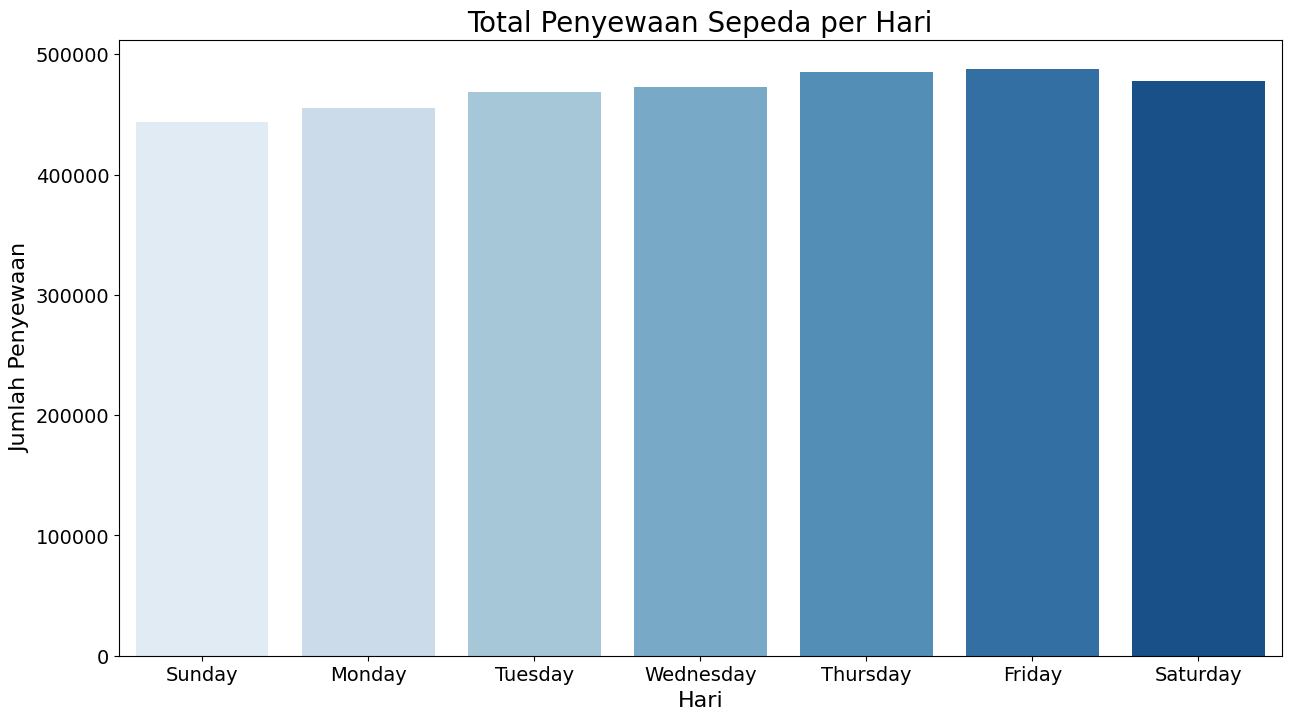

In [136]:
# Grouping data per hari
day_rentals = hour_df.groupby('one_week', observed=True)['count_rental'].sum().reset_index()

# Cari hari dengan penyewaan terbanyak
busiest_day = day_rentals.loc[day_rentals['count_rental'].idxmax()]

# Informasi hari teramai
print(f"Hari dengan penyewaan sepeda terbanyak adalah {busiest_day['one_week']} dengan total {busiest_day['count_rental']:.2f} penyewaan.")

# Plot
plt.figure(figsize=(15, 8))
ax = sns.barplot(x='one_week', y='count_rental', data=day_rentals, hue='one_week', palette='Blues', legend=False)


# Label & title
plt.title("Total Penyewaan Sepeda per Hari", fontsize=20)
plt.xlabel("Hari", fontsize=16)
plt.ylabel("Jumlah Penyewaan", fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# Tampilkan plot
plt.show()

Jam dengan penyewaan sepeda terbanyak adalah pukul 17 dengan total 336860.00 penyewaan.


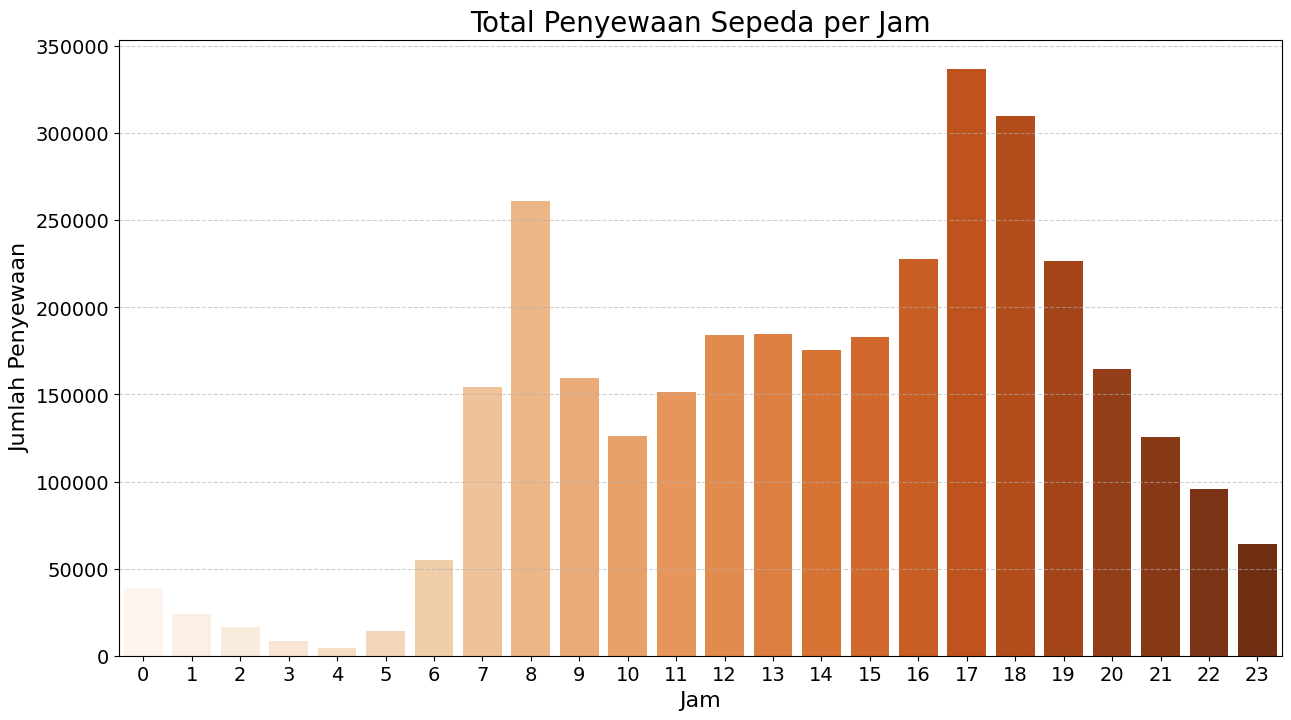

In [137]:
# Grouping data per jam
hour_rentals = hour_df.groupby('hour', observed=True)['count_rental'].sum().reset_index()

# Cari jam dengan penyewaan terbanyak
busiest_hour = hour_rentals.loc[hour_rentals['count_rental'].idxmax()]

# Informasi jam teramai
print(f"Jam dengan penyewaan sepeda terbanyak adalah pukul {busiest_hour['hour']} dengan total {busiest_hour['count_rental']:.2f} penyewaan.")

# Plot
plt.figure(figsize=(15, 8))
sns.barplot(x='hour', y='count_rental', data=hour_rentals, hue='hour', palette='Oranges', legend=False)


plt.title("Total Penyewaan Sepeda per Jam", fontsize=20)
plt.xlabel("Jam", fontsize=16)
plt.ylabel("Jumlah Penyewaan", fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.6)

# Tampilkan plot
plt.show()

Waktu puncak penyewaan sepeda terjadi pada hari Tuesday pukul 17 dengan jumlah penyewaan sebanyak 56605.00 sepeda.


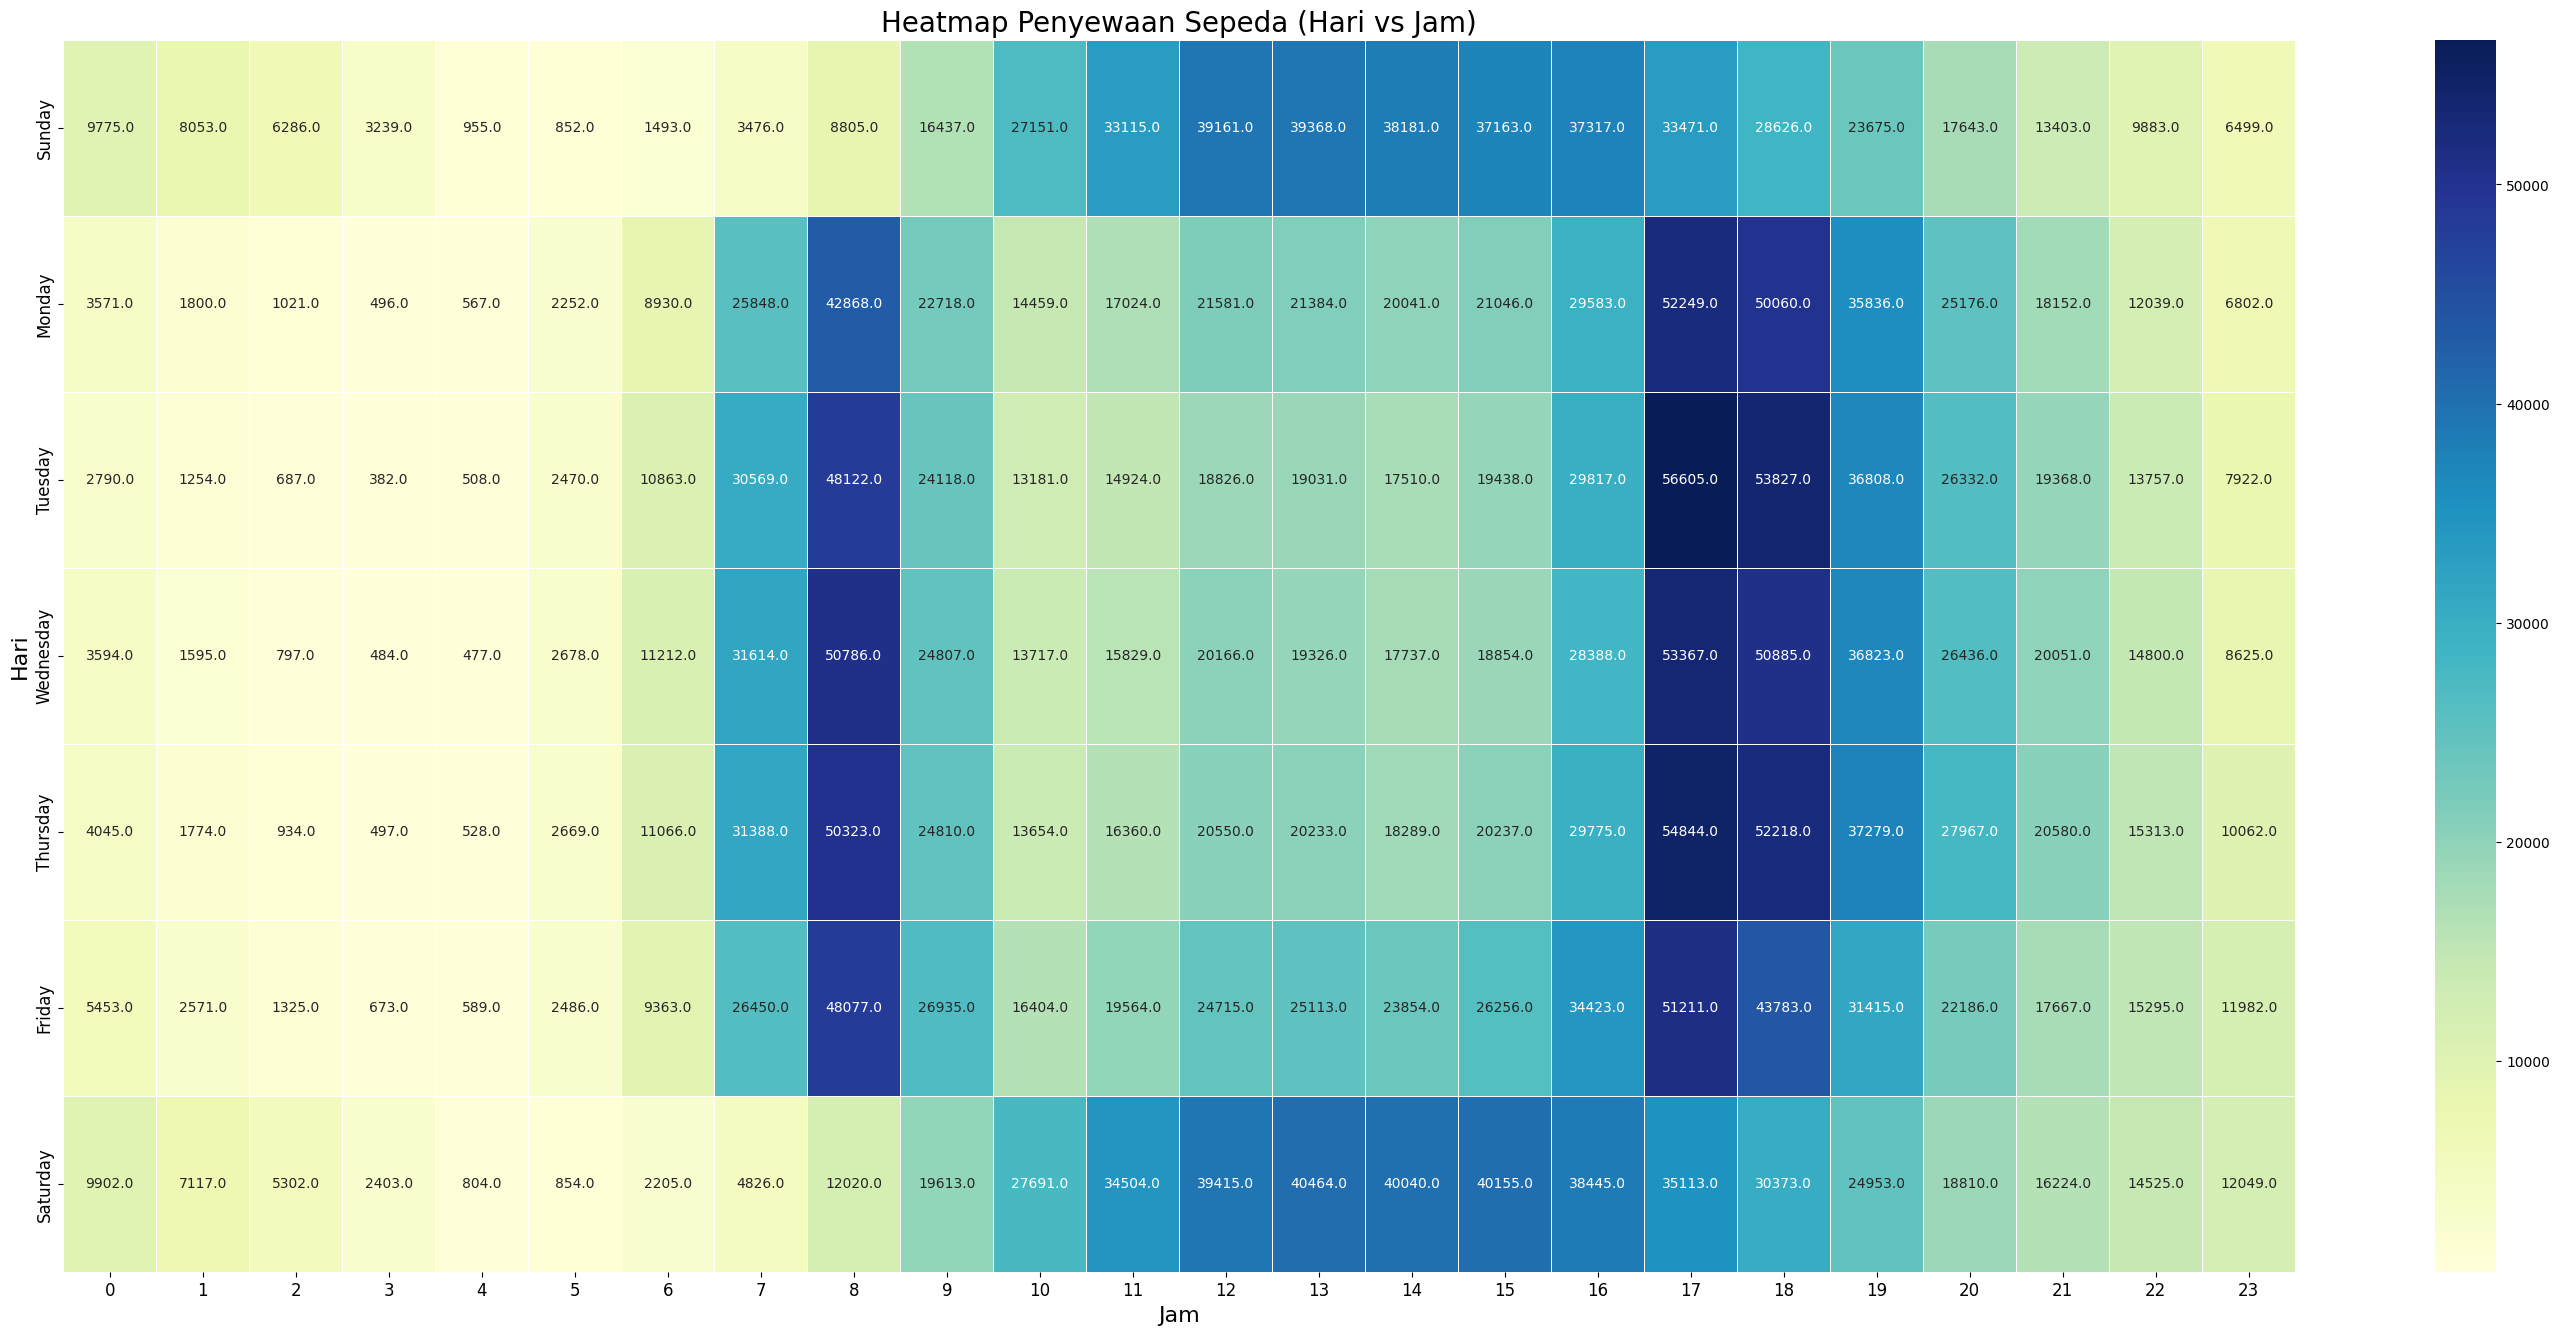

In [138]:
# Grouping data berdasarkan hari dan jam
peak_time_df = hour_df.groupby(['one_week', 'hour'], observed=True)['count_rental'].sum().reset_index()

# Pastikan urutan hari rapi
peak_time_df['one_week'] = pd.Categorical(peak_time_df['one_week'],  ordered=True)

# Cari waktu puncak penyewaan
peak_time = peak_time_df.loc[peak_time_df['count_rental'].idxmax()]

# Informasi waktu puncak
print(f"Waktu puncak penyewaan sepeda terjadi pada hari {peak_time['one_week']} pukul {peak_time['hour']} dengan jumlah penyewaan sebanyak {peak_time['count_rental']:.2f} sepeda.")

# Pivot table untuk heatmap
pivot_table = peak_time_df.pivot_table(index='one_week', columns='hour', values='count_rental', fill_value=0, observed=True)

# Plot Heatmap
plt.figure(figsize=(36, 16))
sns.heatmap(pivot_table, cmap='YlGnBu', annot=True, fmt='.1f', linewidths=0.5)

plt.title("Heatmap Penyewaan Sepeda (Hari vs Jam)", fontsize=20)
plt.xlabel("Jam", fontsize=16)
plt.ylabel("Hari", fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

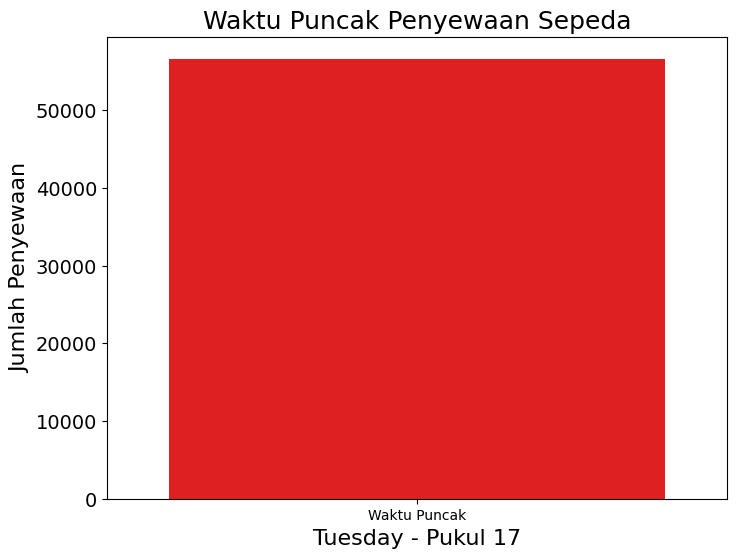

In [157]:
#Grafik puncak hari dan jam penyewaan sepeda
fig, ax = plt.subplots(figsize=(8, 6))

sns.barplot(x=['Waktu Puncak'], y=[peak_time['count_rental']], ax=ax, hue=None, legend=False, color='red')

ax.set_title(f"Waktu Puncak Penyewaan Sepeda", fontsize=18)
ax.set_xlabel(f"{peak_time['one_week']} - Pukul {peak_time['hour']}", fontsize=16)
ax.set_ylabel("Jumlah Penyewaan", fontsize=16)
ax.tick_params(axis='y', labelsize=14)

plt.show()


###### **Insight**

Dari pertanyaan nomor 1 adalah bahwa untuk hari teramai pada hari jumat, namun untuk jam teramai di jam 17.00 namun ketika data digabung maka waktu puncak tersebut terdaapt pada hari selasa pukul 17.00

###### **Insight Nomor 1**

Waktu Puncak Penyewaan Sepeda 
- Hari dengan penyewaan terbanyak memiliki jumlah peminjaman tertinggi, menunjukkan hari-hari tertentu lebih populer untuk penyewaan sepeda (kemungkinan akhir pekan atau hari kerja dengan pola commuting).
- Jam sibuk dalam sehari menunjukkan tren aktivitas pengguna, seperti lonjakan di jam pagi (perjalanan ke kantor/sekolah) dan sore/malam hari (pulang kerja atau aktivitas santai).
- Kombinasi hari & jam menunjukkan waktu puncak absolut untuk penyewaan, yang dapat digunakan untuk strategi operasional (misalnya, ketersediaan sepeda lebih banyak saat peak hours).

### Pertanyaan 2: Pada musim apa penyewaan sepeda paling banyak dan paling sedikit?

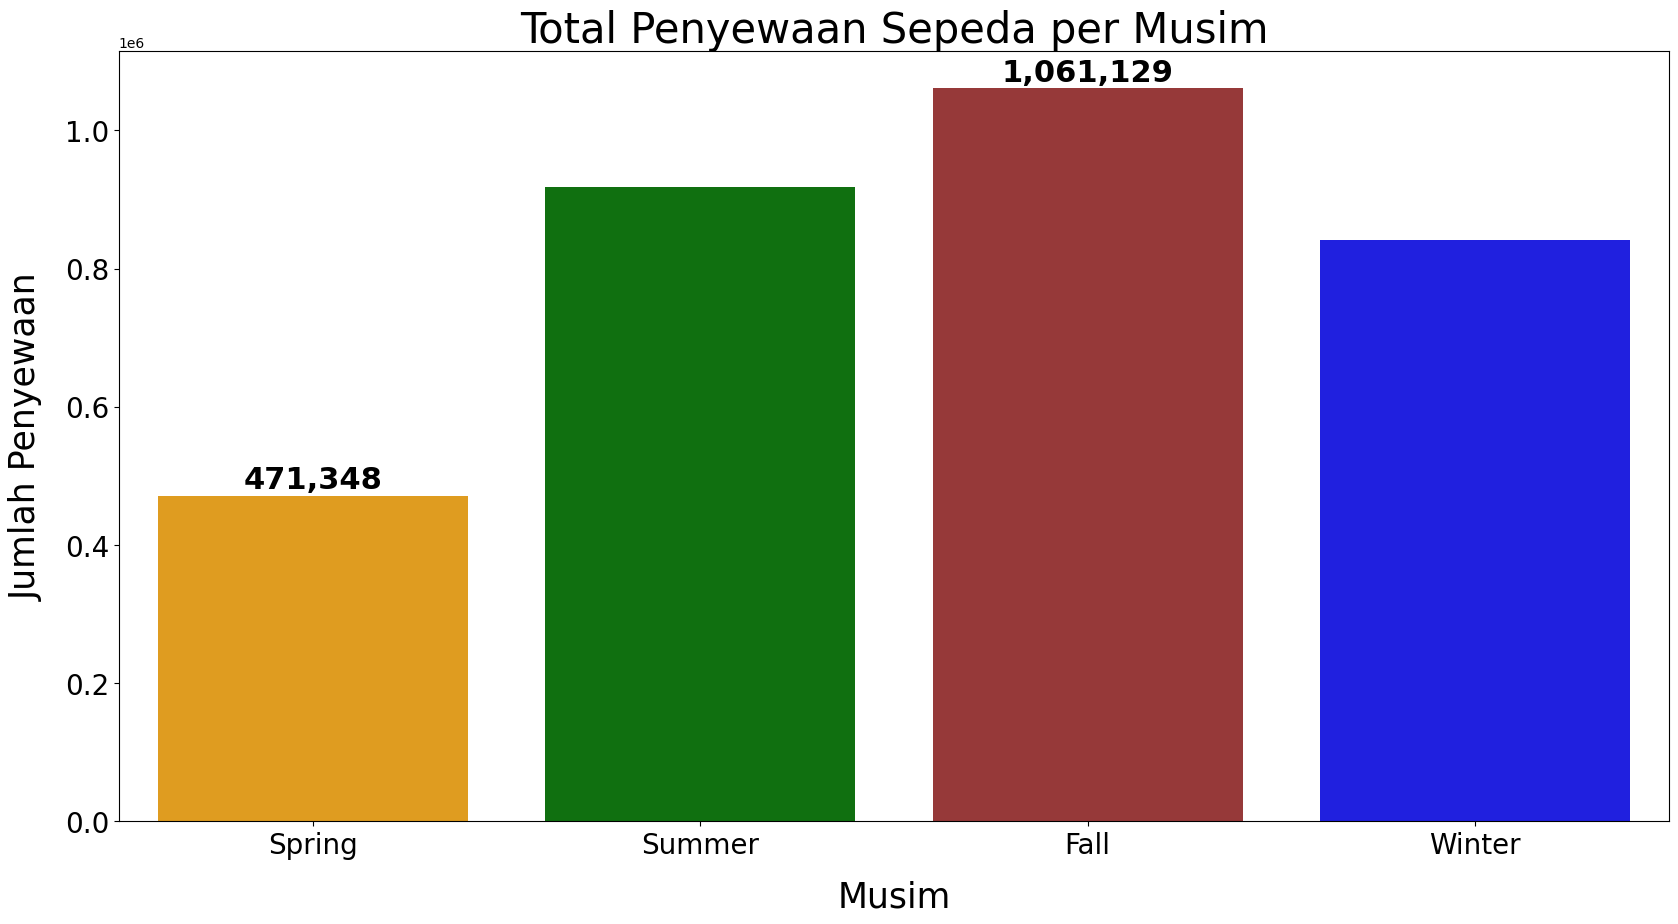

Musim penyewaan sepeda paling banyak adalah Fall dengan jumlah 1,061,129 penyewaan.
Musim penyewaan sepeda paling sedikit adalah Spring dengan jumlah 471,348 penyewaan.


In [140]:
# Warna musim
color_palette = ['orange', 'green', 'brown', 'blue']

# Mengelompokkan data & menghitung total rental per musim
season_rentals = day_df.groupby('season', observed=True)['count_rental'].sum().reset_index()

# Mapping nama musim (pastikan mapping sesuai isi kolom 'season')
season_mapping = {
    "Spring": "Spring",
    "Summer": "Summer",
    "Fall": "Fall",
    "Winter": "Winter"
}

season_rentals['season_name'] = season_rentals['season'].map(season_mapping)

# Cari musim terbanyak dan tersedikit
max_season = season_rentals.loc[season_rentals['count_rental'].idxmax()]
min_season = season_rentals.loc[season_rentals['count_rental'].idxmin()]

# Setup figure dan axis
fig, ax = plt.subplots(figsize=(20, 10))

# Plot barplot dengan warna sesuai musim
sns.barplot(
    data=season_rentals.sort_values(by="count_rental", ascending=False),
    x="season_name",
    y="count_rental",
    hue="season_name",
    palette=color_palette,
    legend=False,
    ax=ax
)

# Pengaturan tampilan grafik
ax.set_title("Total Penyewaan Sepeda per Musim", loc="center", fontsize=30)
ax.set_xlabel("Musim", fontsize=25, labelpad=15)
ax.set_ylabel("Jumlah Penyewaan", fontsize=25, labelpad=15)
ax.tick_params(axis='x', labelsize=20)
ax.tick_params(axis='y', labelsize=20)

# Tambahkan anotasi untuk penyewaan terbanyak dan tersedikit
ax.text(
    max_season['season_name'], max_season['count_rental'] + 10000,  # Posisi teks di atas bar
    f"{max_season['count_rental']:,}",
    ha='center', fontsize=22, color='black', weight='bold'
)

ax.text(
    min_season['season_name'], min_season['count_rental'] + 10000,  # Posisi teks di atas bar
    f"{min_season['count_rental']:,}",
    ha='center', fontsize=22, color='black', weight='bold'
)

# Tampilkan plot
plt.show()

# Cetak keterangan
print(f"Musim penyewaan sepeda paling banyak adalah {max_season['season_name']} dengan jumlah {max_season['count_rental']:,} penyewaan.")
print(f"Musim penyewaan sepeda paling sedikit adalah {min_season['season_name']} dengan jumlah {min_season['count_rental']:,} penyewaan.")


###### **Insight Nomor 2**
Pengaruh Musim terhadap Penyewaan Sepeda
- Musim Gugur cenderung memiliki jumlah penyewaan tertinggi, menunjukkan bahwa cuaca yang baik berkontribusi pada tingginya permintaan.
- Musim semi berpotensi menurunkan jumlah penyewaannya.

### Pertanyaan 3: Apakah suhu, cuaca, dan kelembapan mempengaruhi terhadap penyewaan sepeda?

#### mempengaruhi suhu

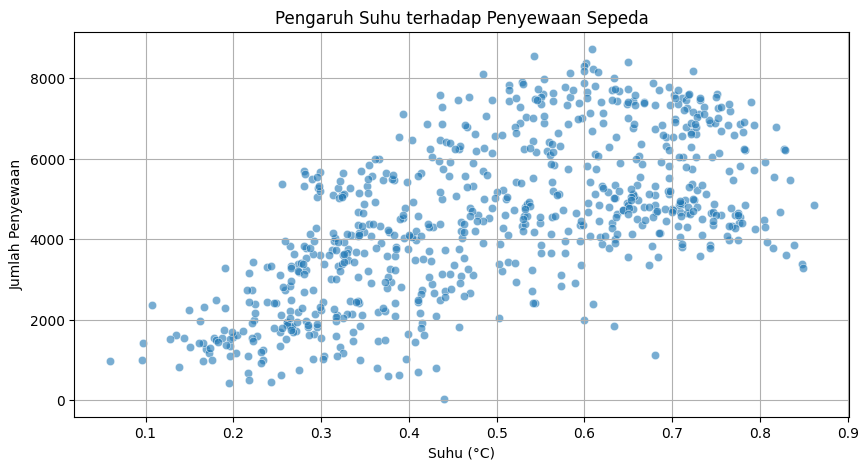

Korelasi antara suhu dan penyewaan: 0.63


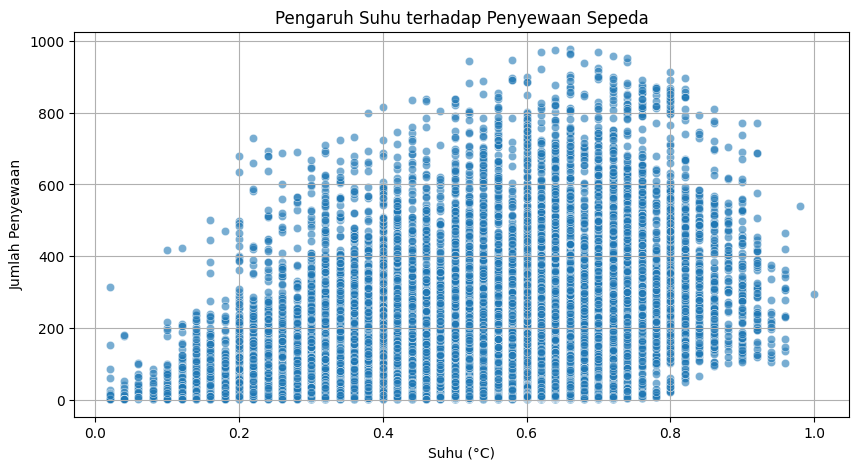

Korelasi antara suhu dan penyewaan: 0.40


In [141]:
plt.figure(figsize=(10, 5))
sns.scatterplot(x=day_df['temp'], y=day_df['count_rental'], alpha=0.6)
plt.title("Pengaruh Suhu terhadap Penyewaan Sepeda")
plt.xlabel("Suhu (°C)")
plt.ylabel("Jumlah Penyewaan")
plt.grid(True)
plt.show()

# Hitung korelasi suhu dengan penyewaan
correlation_temp = day_df['temp'].corr(day_df['count_rental'])
print(f"Korelasi antara suhu dan penyewaan: {correlation_temp:.2f}")

plt.figure(figsize=(10, 5))
sns.scatterplot(x=hour_df['temp'], y=hour_df['count_rental'], alpha=0.6)
plt.title("Pengaruh Suhu terhadap Penyewaan Sepeda")
plt.xlabel("Suhu (°C)")
plt.ylabel("Jumlah Penyewaan")
plt.grid(True)
plt.show()

# Hitung korelasi suhu dengan penyewaan
correlation_temp = hour_df['temp'].corr(hour_df['count_rental'])
print(f"Korelasi antara suhu dan penyewaan: {correlation_temp:.2f}")

In [142]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   instant            731 non-null    int64         
 1   date               731 non-null    datetime64[ns]
 2   season             731 non-null    category      
 3   year               731 non-null    object        
 4   month              731 non-null    category      
 5   holiday            731 non-null    category      
 6   one_week           731 non-null    category      
 7   weather_condition  731 non-null    category      
 8   temp               731 non-null    float64       
 9   atemp              731 non-null    float64       
 10  humidity           731 non-null    float64       
 11  windspeed          731 non-null    float64       
 12  casual             731 non-null    int64         
 13  registered         731 non-null    int64         
 14  count_rent

##### mempengaruhi cuaca

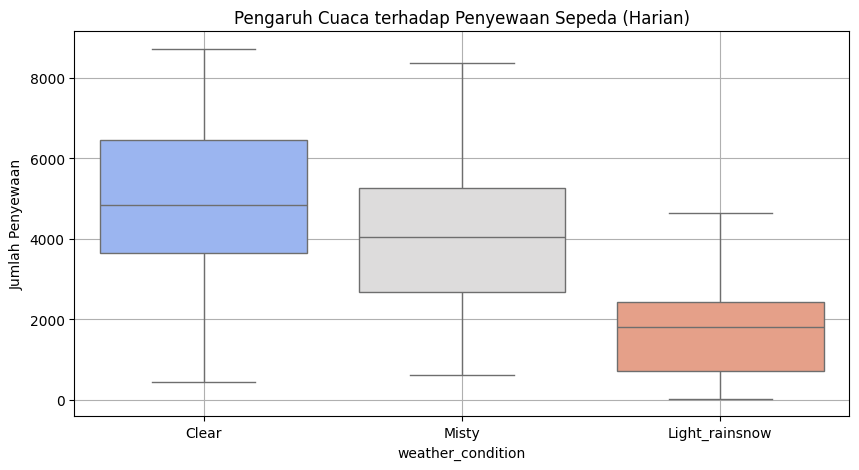

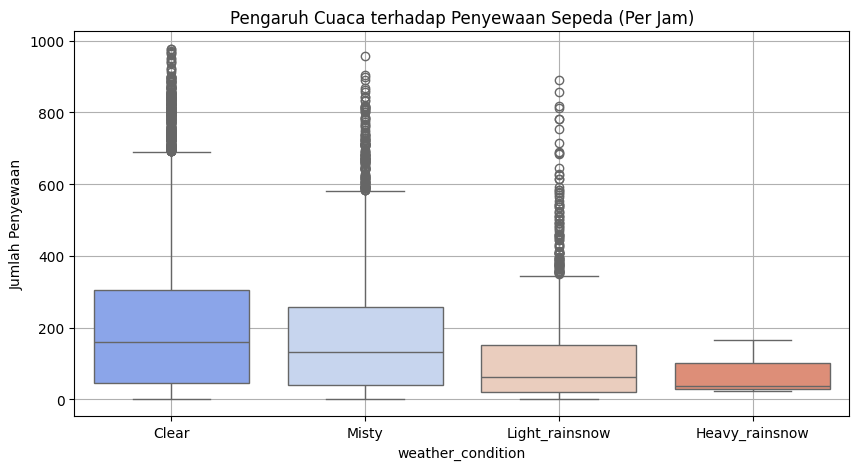

In [143]:
# Plot untuk data harian (day_df)
plt.figure(figsize=(10, 5))
sns.boxplot(x='weather_condition', y='count_rental', data=day_df, hue='weather_condition', palette="coolwarm", legend=False)
plt.title("Pengaruh Cuaca terhadap Penyewaan Sepeda (Harian)")
plt.ylabel("Jumlah Penyewaan")
plt.grid(True)
plt.show()

# Plot untuk data per jam (hour_df)
plt.figure(figsize=(10, 5))
sns.boxplot(x='weather_condition', y='count_rental', data=hour_df, hue='weather_condition', palette="coolwarm", legend=False)
plt.title("Pengaruh Cuaca terhadap Penyewaan Sepeda (Per Jam)")
plt.ylabel("Jumlah Penyewaan")
plt.grid(True)
plt.show()

###### mempengaruhi kelembapan

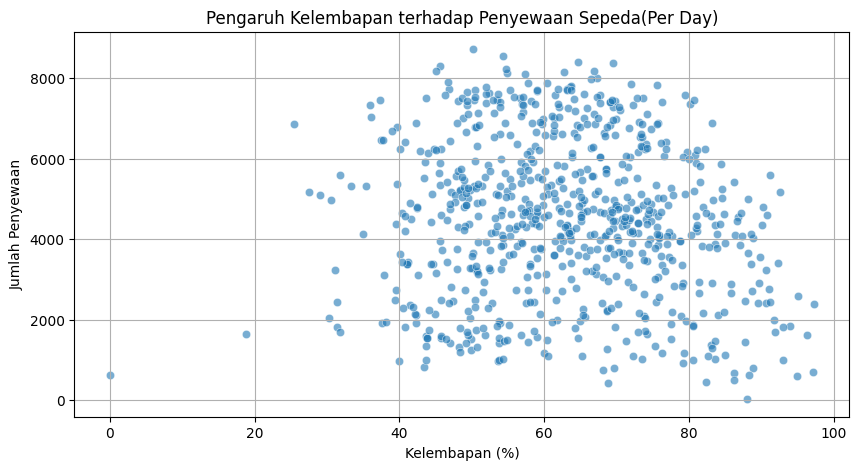

Korelasi antara kelembapan dan penyewaan(Per Day): -0.10


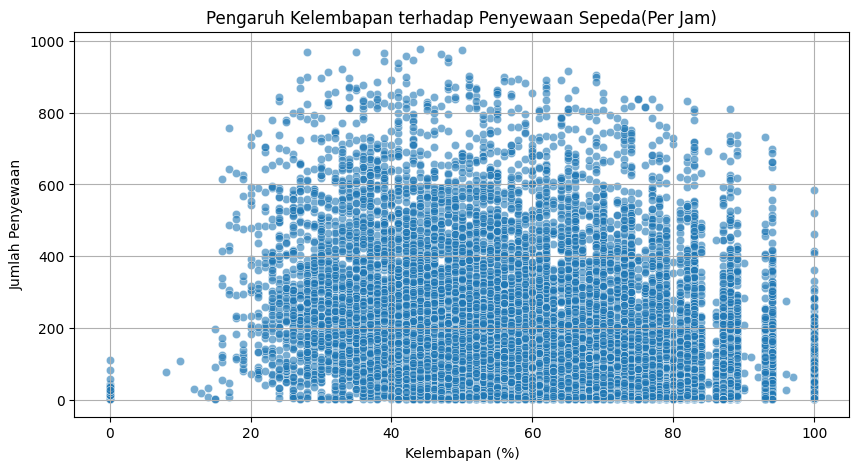

Korelasi antara kelembapan dan penyewaan(Per Jam): -0.32


In [144]:
plt.figure(figsize=(10, 5))
sns.scatterplot(x=day_df['humidity'], y=day_df['count_rental'], alpha=0.6)
plt.title("Pengaruh Kelembapan terhadap Penyewaan Sepeda(Per Day)")
plt.xlabel("Kelembapan (%)")
plt.ylabel("Jumlah Penyewaan")
plt.grid(True)
plt.show()

# Hitung korelasi kelembapan dengan penyewaan
correlation_humidity = day_df['humidity'].corr(day_df['count_rental'])
print(f"Korelasi antara kelembapan dan penyewaan(Per Day): {correlation_humidity:.2f}")

plt.figure(figsize=(10, 5))
sns.scatterplot(x=hour_df['humidity'], y=hour_df['count_rental'], alpha=0.6)
plt.title("Pengaruh Kelembapan terhadap Penyewaan Sepeda(Per Jam)")
plt.xlabel("Kelembapan (%)")
plt.ylabel("Jumlah Penyewaan")
plt.grid(True)
plt.show()

# Hitung korelasi kelembapan dengan penyewaan
correlation_humidity = hour_df['humidity'].corr(hour_df['count_rental'])
print(f"Korelasi antara kelembapan dan penyewaan(Per Jam): {correlation_humidity:.2f}")

**Insight**

Faktor cuaca, suhu, dan kelembapan memiliki pengaruh signifikan terhadap jumlah penyewaan sepeda.

###### **Insight Nomor 3**
Pengaruh Suhu, Cuaca, dan Kelembapan 
- Suhu meningkat → jumlah penyewaan meningkat hingga titik tertentu, tetapi suhu yang terlalu panas bisa menyebabkan penurunan permintaan.
- Cuaca ekstrem (hujan/berangin) menurunkan jumlah peminjaman sepeda.
- Kelembapan tinggi berpotensi mengurangi kenyamanan pengguna dan berdampak pada turunnya jumlah penyewaan.


### Pertanyaan 4: Bagaimana performa penyewaan sepeda dalam tahun terakhir?

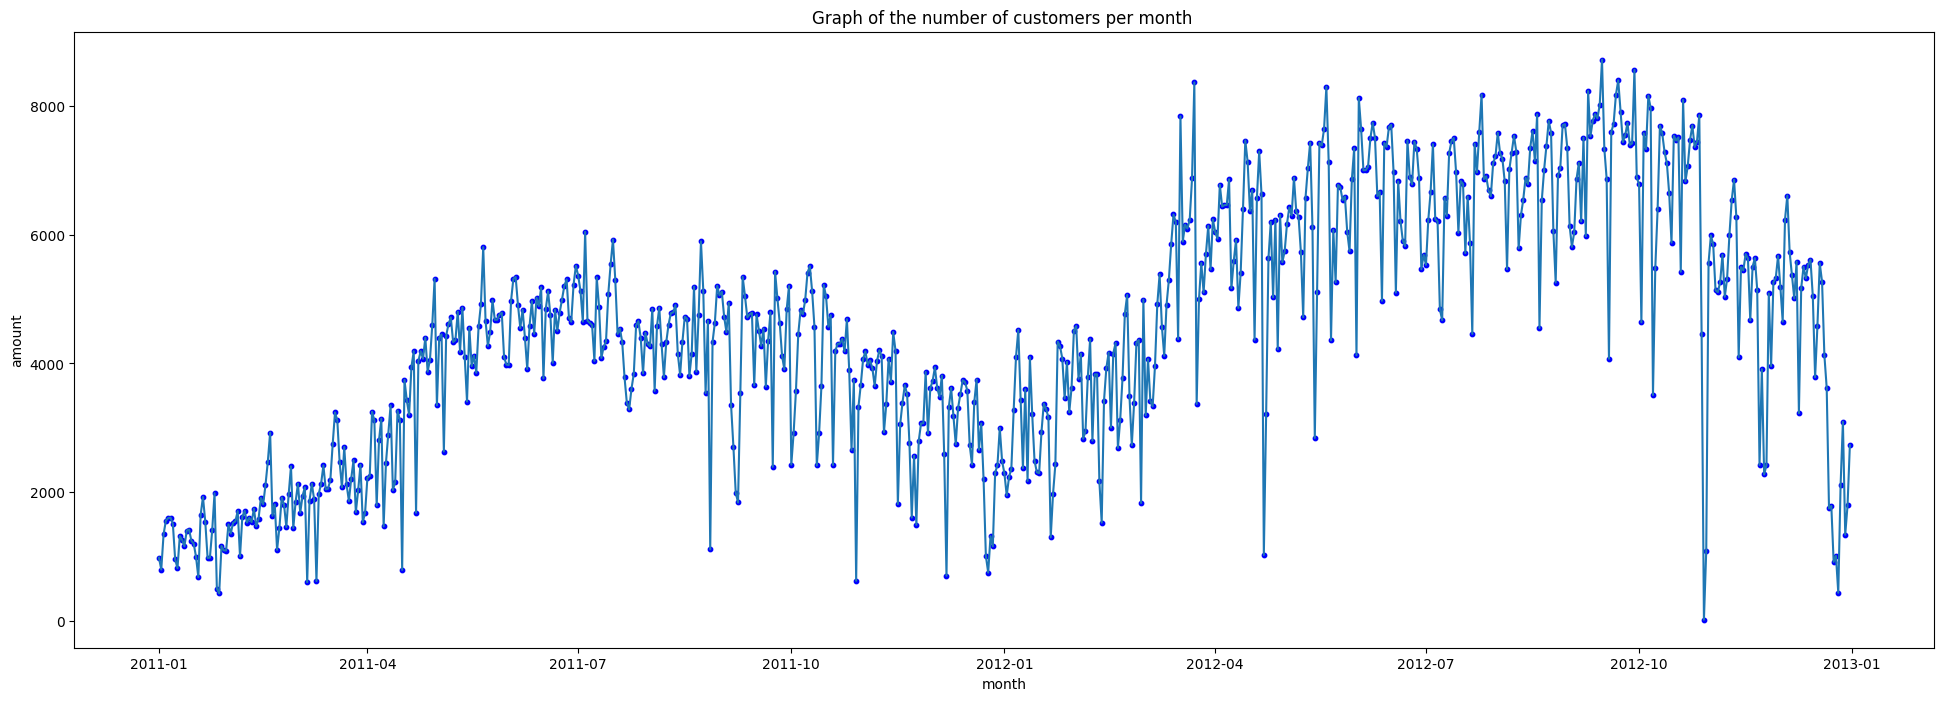

In [145]:

plt.figure(figsize=(24,8))
day_df['date'] = pd.to_datetime(day_df['date'])
monthly_counts = day_df['count_rental'].groupby(day_df['date']).max()
plt.scatter(monthly_counts.index, monthly_counts.values, c="blue", s=10, marker='o')
plt.plot(monthly_counts.index, monthly_counts.values)
plt.xlabel('month')
plt.ylabel('amount')
plt.title('Graph of the number of customers per month ')
plt.show()

##### **Insight Nomor 4**
- Visualiasi tersebut mendapatkan bahwa penyewaan sepeda ini ada peningkatan di tahun 2012 puncaknya pada bulan september namun mengalami juga penurunan pada bulan selanjutnya yakni dari november sampai desember
- Tren tahunan/bulanan dapat membantu mengidentifikasi pola siklus penyewaan dan mempersiapkan strategi bisnis (misalnya, meningkatkan promosi pada bulan-bulan sepi).
- Peningkatan atau penurunan signifikan dalam jangka waktu tertentu dapat menunjukkan faktor eksternal seperti peristiwa khusus, kebijakan transportasi, atau tren gaya hidup.

### Pertanyaan 5: Seberapa banyak orang memilih registered dan casual untuk melakukan rental sepeda?

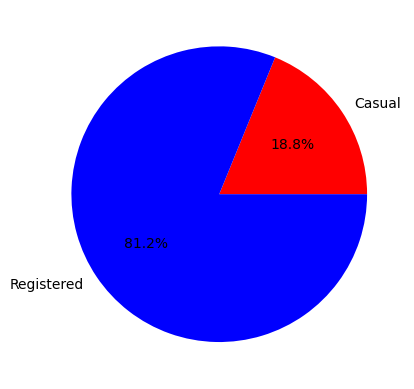

In [146]:
# Menjumlahkan semua elemen dalam kolom casual
total_casual = sum(day_df['casual'])

# Menjumlahkan semua elemen dalam kolom registered
total_registered = sum(day_df['registered'])

# Membuat data untuk pie plot
data = [total_casual, total_registered]
labels = ['Casual', 'Registered']

# Membuat pie plot
plt.pie(data, labels=labels, autopct='%1.1f%%', colors=["red","blue"])

# Menampilkan pie plot
plt.show()

**Insight Nomor 5:**

- Registered lebih banyak daripada casual
- Bisa disimpulkan bahwa mayoritas pengguna adalah pelanggan tetap yang menggunakan layanan secara rutin.
- Strategi pemasaran dapat disesuaikan untuk meningkatkan loyalitas pengguna terdaftar atau menarik lebih banyak pengguna kasual menjadi pelanggan tetap.

## Analisis Lanjutan (Opsional)

### Analisis Clustering

##### Clustering manual berdasarkan jumlah peminjaman sepeda

In [147]:
bins = [0, 2000, 4000, 6000, 10000]
labels = ['Low', 'Medium', 'High', 'Very High']
day_df['rental_category'] = pd.cut(day_df['count_rental'], bins=bins, labels=labels)
print("\nDistribusi Kategori Rental Sepeda:")
print(day_df['rental_category'].value_counts())


Distribusi Kategori Rental Sepeda:
rental_category
High         272
Medium       181
Very High    180
Low           98
Name: count, dtype: int64


##### **Insight**

Dengan kategori Low, Medium, High, Very High, kita dapat mengelompokkan karakteristik lokasi, waktu, atau faktor lingkungan yang menyebabkan jumlah penyewaan tinggi/rendah.

#### Total penyewa berdasarkan pada kolom season

In [148]:
hour_df.groupby(by="season", observed=True)['count_rental'].nunique().sort_values(ascending=False)

season
Fall      760
Summer    721
Winter    690
Spring    482
Name: count_rental, dtype: int64

##### **Insight**

Musim menjadi salah satu pengaruh untuk melakukan penyewaan sepeda

#### Total penyewa berdasarkan jam pada kolom weather condition

In [149]:
hour_df.groupby(by="weather_condition", observed=True)['count_rental'].nunique().sort_values(ascending=False)

weather_condition
Clear             848
Misty             649
Light_rainsnow    368
Heavy_rainsnow      3
Name: count_rental, dtype: int64

##### **Insight**

Cuaca menjadi salah satu pengaruh untuk melakukan penyewaan sepeda

#### Total penyewa berdasarkan weekdays dan weekend pada kolom category_days

In [150]:
hour_df.groupby(by="category_days").agg({
    "count_rental":["count"]
})

,count_rental
,count
category_days,
weekdays,12365
weekend,5014


##### **Insight**

Kategori hari menjadi salah satu pengaruh untuk melakukan penyewaan sepeda yang mana weekdays daripada weekend

#### Total penyewa berdasarkan kolom humidity_category

In [151]:
hour_df.groupby(by="humidity_category").agg({
    "count_rental":["count"]
})

,count_rental
,count
humidity_category,
moist,5505
too dry,3518
too moist,8356


##### **Insight**

Kelembapan menjadi salah satu pengaruh untuk melakukan penyewaan sepeda

### RFM Analysis

Analisis RFM adalah metode segmentasi pelanggan yang menggunakan data perilaku pelanggan untuk mengelompokkan pelanggan

#### RFM Analysis pada tabel day_df

In [152]:
rfm_df = day_df.groupby('date').agg({
    'count_rental': 'sum'
}).reset_index()

rfm_df['recency'] = (rfm_df['date'].max() - rfm_df['date']).dt.days
rfm_df['frequency'] = 1  # Setiap hari dihitung sebagai 1 transaksi
rfm_df['monetary'] = rfm_df['count_rental']

print(rfm_df.head())

        date  count_rental  recency  frequency  monetary
0 2011-01-01           985      730          1       985
1 2011-01-02           801      729          1       801
2 2011-01-03          1349      728          1      1349
3 2011-01-04          1562      727          1      1562
4 2011-01-05          1600      726          1      1600


#### RFM Analysis pada tabel hour_df

In [153]:
# Pastikan kolom date bertipe datetime
hour_df['date'] = pd.to_datetime(hour_df['date'])

# Menentukan tanggal terbaru dalam dataset
current_date = hour_df['date'].max()

# Menghitung RFM berdasarkan pengguna terdaftar (registered)
rfm_df = hour_df.groupby('registered').agg({
    'date': lambda x: (current_date - x.max()).days,  # Recency: hari sejak transaksi terakhir
    'instant': 'count',  # Frequency: jumlah transaksi
    'count_rental': 'sum'  # Monetary: total penyewaan
}).reset_index()

# Mengganti nama kolom agar sesuai dengan konsep RFM
rfm_df.columns = ['registered', 'recency', 'frequency', 'monetary']

# Menampilkan hasil
print(rfm_df.head())

   registered  recency  frequency  monetary
0           0       38         24        35
1           1        0        201       294
2           2        1        245       648
3           3        0        294      1154
4           4        3        307      1602


##### **Insight**

- Recency (R): Seberapa baru pengguna terakhir kali menyewa sepeda.
- Frequency (F): Seberapa sering pengguna menyewa sepeda dalam periode tertentu.
- Monetary (M): Total jumlah penyewaan yang dilakukan pengguna.
Hasil analisis ini bisa digunakan untuk strategi pemasaran, misalnya memberikan insentif kepada pengguna dengan recency tinggi atau menawarkan paket langganan kepada pengguna dengan frequency tinggi.


## Conclusion

- 1. Kapan Waktu Puncak unruk melakukan penyewaan sepeda (Hari, Jam, Serta, Hari dan Jam)?
- 2. Pada musim apa penyewaan sepeda paling banyak dan paling sedikit?
- 3. Bagaimana pengaruh suhu, cuaca, dan kelembapan terhadap penyewaan sepeda?
- 4. Bagaimana performa penyewaan sepeda dalam tahun terakhir?
- 5. Seberapa banyak orang memilih registered dan casual untuk melakukan rental sepeda?

Pembahasan
- 1. - Untuk Hari teramai pernyewaan sepeda terbanyak adalah hari Jumat
    - Untuk Jam teramai penyewaan sepeda itu di jam 17.00
    - Untuk Hari dan jam teramai kombinasi kedua tabel day_df dan hour_df adalah hari Jumat pada pukul 17.00

- 2.  Untuk penyewaan sepeda tertinggi ini terdapat pada musim fall (gugur) sedangkan untuk penyewaan sepeda terendah ini terdapat pada musim spring (semi)

- 3. - suhu:
     Dari korelasi pada tabel day_df dan hour_df yakni korelasi yang positif (0.63 & 0.40) yang berarti jika semakin hangat suhu maka semakin banyak sepdan yang disewa
     - cuaca:
     Jika cuaca cerah maka penyewaan sepeda itu akan tinggi yang berarti banyak yang akan sewa sepeda jika cuaca clear
     - kelembapan:
     Kelembapan memiliki korelasi negatif dengan penyewaan sepeda yang maka semakin tinggi kelembapan, bisa saja untuk jumlah penyewaan sepeda berkurang

- 4. Untuk performa dalam tahun terakhir maka penyewaan sepeda tersebut bisa dibilang meningkat yang mana untuk orderan terendah pada dua tahun tersebut di januari 2011 dan mengalami peningkatan sehingga puncaknya pada september 2012

- 5. Lebih banyak pengguna registered dibandingkan dengan casual dengan persentase masing-masing 81.2% dan 18.8%


In [154]:
!pip freeze > requirements.txt

In [155]:
df_combined = pd.concat([day_df, hour_df], ignore_index=True)

In [156]:
df_combined.to_csv("main_data.csv", index=False)